Accuracy: 0.956140350877193
Confusion Matrix:
 [[70  1]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC Score: 0.9977071732721914


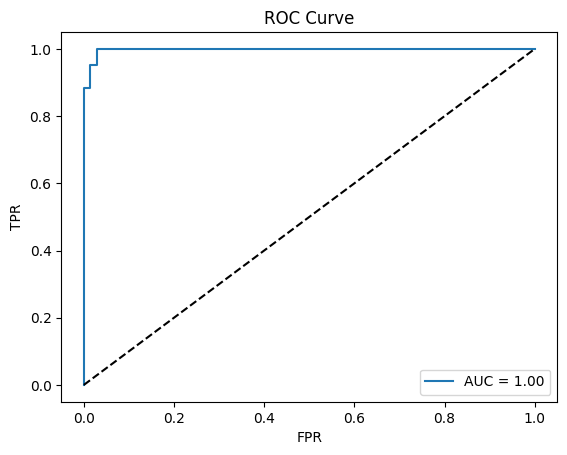

In [2]:
'''
Task 5: Binary Classification with Logistic Regression
● Load the Breast Cancer Dataset from sklearn.datasets.
● Train a logistic regression model to predict whether a tumor is
benign or malignant.
● Evaluate using:
○ Accuracy
○ Confusion Matrix
○ Precision, Recall, F1-score
○ ROC-AUC curve

'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, f1_score
)

# Load dataset
df = pd.read_csv('breast-cancer.csv')

# Convert target to binary (Malignant = 1, Benign = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop ID column
df.drop(columns=['id'], inplace=True)

# Features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()



Threshold = 0.3
Confusion Matrix:
 [[70  1]
 [ 2 41]]
F1 Score: 0.9647058823529412

Threshold = 0.5
Confusion Matrix:
 [[70  1]
 [ 4 39]]
F1 Score: 0.9397590361445783

Threshold = 0.7
Confusion Matrix:
 [[70  1]
 [ 4 39]]
F1 Score: 0.9397590361445783


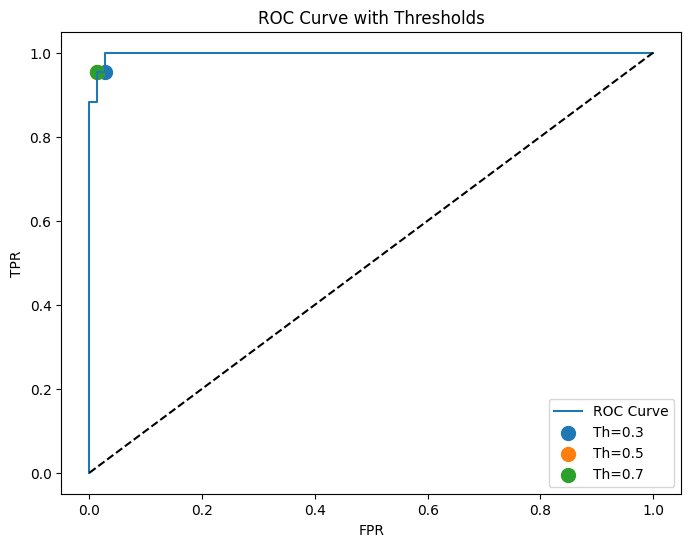

In [3]:
'''
Task 6: Threshold Tuning and Probability Interpretation
● Predict the probability of the positive class.
● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the
confusion matrix and F1-score change.
● Plot the ROC curve and mark optimal threshold.

'''

thresholds_to_try = [0.3, 0.5, 0.7]

for t in thresholds_to_try:
    y_pred_thresh = (y_prob >= t).astype(int)
    print(f"\nThreshold = {t}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
    print("F1 Score:", f1_score(y_test, y_pred_thresh))

# Plot ROC with threshold markers
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
for t in thresholds_to_try:
    idx = next(i for i, val in enumerate(thresholds) if val <= t)
    plt.scatter(fpr[idx], tpr[idx], label=f'Th={t}', s=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve with Thresholds")
plt.legend()
plt.show()
